In [528]:
# подключаем библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [529]:
X_train = pd.read_json("..\\res\\l3\\train.jsonl", lines=True)
X_test =  pd.read_json("..\\res\\l3\\test.jsonl", lines=True)

In [530]:
X_test

,id,id_1,id_2,text_1,text_2,class
0,25349,34420,34421,Цены на нефть восстанавливаются,Парламент Словакии поблагодарил народы бывшего...,-1
1,25360,34438,34439,"""Гоголь-центр"" покажет видеозапись скандальног...",Кехман запретил «Гоголь-центру» показывать вид...,-1
2,25382,34475,34476,Агент: РФС вновь задерживает зарплату Фабио Ка...,СМИ: Агент Фабио Капелло грозится подать в суд...,-1
3,25423,34494,34519,День Победы в Москве обещает выдаться облачным,Любляна отпразднует День Победы вместе с Москвой,-1
4,25430,34531,34532,Посол РФ в США: Россия будет бороться с попытк...,Правительство запланировало заработать на лоте...,-1
...,...,...,...,...,...,...
1919,28485,37600,37601,Девять человек пострадали при пожаре в жилом д...,При пожаре в жилом доме в центре Санкт-Петербу...,1
1920,28486,37602,37603,"""Химки"" победили ""Локомотив-Кубань"" и сыграют ...","""Химки"" обыграли ""Локомотив-Кубань"" и вышли в ...",0
1921,28499,37606,37618,Полицейские в США застрелили афроамериканца в ...,Полицейский в США спас мужчину от наводнения и...,-1
1922,28510,37604,37636,"Полицейский в США спас мужчину от наводнения, ...",Washington Post: В 2015 году полицейские США з...,-1


In [531]:
X_train

,id,id_1,id_2,text_1,text_2,class
0,1,201,8159,Полицейским разрешат стрелять на поражение по ...,Полиции могут разрешить стрелять по хулиганам ...,0
1,2,202,8158,Право полицейских на проникновение в жилище ре...,Правила внесудебного проникновения полицейских...,0
2,3,273,8167,Президент Египта ввел чрезвычайное положение в...,Власти Египта угрожают ввести в стране чрезвыч...,0
3,4,220,8160,Вернувшихся из Сирии россиян волнует вопрос тр...,Самолеты МЧС вывезут россиян из разрушенной Си...,-1
4,5,223,8160,В Москву из Сирии вернулись 2 самолета МЧС с р...,Самолеты МЧС вывезут россиян из разрушенной Си...,0
...,...,...,...,...,...,...
7222,25514,34622,34633,Путин освободил от должности ряд генералов,Путин снял с должностей более 20 руководителей...,0
7223,25524,34566,34654,Облака над Москвой в День Победы разгонят девя...,Путеводитель по Дню Победы: как провести 9 мая...,-1
7224,25548,34519,34681,Любляна отпразднует День Победы вместе с Москвой,В Москве ограничат движение в связи с Днем Победы,-1
7225,25549,34565,34681,Девять самолетов ВВС разгонят облака над Москв...,В Москве ограничат движение в связи с Днем Победы,-1


In [532]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7227 non-null   int64 
 1   id_1    7227 non-null   int64 
 2   id_2    7227 non-null   int64 
 3   text_1  7227 non-null   object
 4   text_2  7227 non-null   object
 5   class   7227 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 338.9+ KB


In [533]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1924 non-null   int64 
 1   id_1    1924 non-null   int64 
 2   id_2    1924 non-null   int64 
 3   text_1  1924 non-null   object
 4   text_2  1924 non-null   object
 5   class   1924 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 90.3+ KB


In [534]:
y_train = X_train['class']
y_test = X_test['class']

In [535]:
X_test.drop(['id', 'id_1', 'id_2', 'class'], axis=1, inplace=True)
X_train.drop(['id', 'id_1', 'id_2', 'class'], axis=1, inplace=True)

In [536]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яА-Я0-9]', ' ', text) # Удаляет пунктуацию
    text = re.sub(r'\w*\d+\w*', '', text) # Удаляет цифры
    # text = re.sub('\s{2,}', " ", text) # Удаляет ненужные пробелы
    return text

X_test['text_1'] = X_test['text_1'].apply(clean_text)
X_train['text_1'] = X_train['text_1'].apply(clean_text)
X_test['text_2'] = X_test['text_2'].apply(clean_text)
X_train['text_2'] = X_train['text_2'].apply(clean_text)

In [537]:
import pymorphy3
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language="russian")
morph = pymorphy3.MorphAnalyzer()

def to_norm_word(text):
    text = [morph.parse(word)[0].normal_form for word in text.split()]
    # text = [snowball.stem(word) for word in text.split()]
    return ' '.join(text)

X_test['text_1'] = X_test['text_1'].apply(to_norm_word)
X_train['text_1'] = X_train['text_1'].apply(to_norm_word)
X_test['text_2'] = X_test['text_2'].apply(to_norm_word)
X_train['text_2'] = X_train['text_2'].apply(to_norm_word)

X_test_copy = X_test.copy()
X_train_copy = X_train.copy()

In [538]:
X_train

,text_1,text_2
0,полицейский разрешить стрелять на поражение по...,полиция мочь разрешить стрелять по хулиган с т...
1,право полицейский на проникновение в жилище ре...,правило внесудебный проникновение полицейский ...
2,президент египет ввести чрезвычайный положение...,власть египет угрожать ввести в страна чрезвыч...
3,вернуться из сирия россиянин волновать вопрос ...,самолёт мчс вывезти россиянин из разрушить сирия
4,в москва из сирия вернуться самолёт мчс с росс...,самолёт мчс вывезти россиянин из разрушить сирия
...,...,...
7222,путин освободить от должность ряд генерал,путин снять с должность более руководитель сил...
7223,облако над москва в день победа разогнать девя...,путеводитель по день победа как провести май в...
7224,люблян отпраздновать день победа вместе с москва,в москва ограничить движение в связь с день по...
7225,девять самолёт ввс разогнать облако над москва...,в москва ограничить движение в связь с день по...


In [539]:
X_test

,text_1,text_2
0,цена на нефть восстанавливаться,парламент словакия поблагодарить народ бывший ...
1,гоголь центр показать видеозапись скандальный ...,кехман запретить гоголь центр показывать видео...
2,агент рфс вновь задерживать зарплата фабио кап...,сми агент фабио капелло грозиться подать в суд...
3,день победа в москва обещать выдаться облачный,люблян отпраздновать день победа вместе с москва
4,посол рф в сша россия быть бороться с попытка ...,правительство запланировать заработать на лоте...
...,...,...
1919,девять человек пострадать при пожар в жилой до...,при пожар в жилой дом в центр санкт петербург ...
1920,химки победить локомотив кубань и сыграть с цс...,химки обыграть локомотив кубань и выйти в фина...
1921,полицейский в сша застрелить афроамериканец в ...,полицейский в сша спасти мужчина от наводнение...
1922,полицейский в сша спасти мужчина от наводнение...,в год полицейский сша застрелить человек


In [540]:
y_train.value_counts()

class
 0    2957
-1    2582
 1    1688
Name: count, dtype: int64

In [541]:
y_test.value_counts()

class
 0    778
-1    772
 1    374
Name: count, dtype: int64

# Частотная векторизация

In [542]:
import nltk

In [543]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords
vect = TfidfVectorizer(stop_words=stopwords.words("russian"))
vect2 = TfidfVectorizer(stop_words=stopwords.words("russian"))
vect_x_train1 = vect.fit_transform(X_train['text_1'])
vect_x_train2 = vect2.fit_transform(X_train['text_2'])
vect_x_test1 = vect.transform(X_test['text_1'])
vect_x_test2 = vect2.transform(X_test['text_2'])
vect.vocabulary_

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\games\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'полицейский': 4841,
 'разрешить': 5519,
 'стрелять': 6482,
 'поражение': 4913,
 'гражданин': 1379,
 'травматика': 6789,
 'право': 5023,
 'проникновение': 5302,
 'жилище': 1850,
 'решить': 5701,
 'ограничить': 4032,
 'президент': 5086,
 'египет': 1787,
 'ввести': 711,
 'чрезвычайный': 7496,
 'положение': 4857,
 'мятежный': 3514,
 'город': 1340,
 'вернуться': 765,
 'сирия': 6070,
 'россиянин': 5773,
 'волновать': 953,
 'вопрос': 967,
 'трудоустройство': 6854,
 'родина': 5724,
 'москва': 3434,
 'самолёт': 5865,
 'мчс': 3496,
 'борт': 596,
 'пристав': 5194,
 'собрать': 6206,
 'отпечаток': 4284,
 'палец': 4378,
 'российский': 5770,
 'должник': 1670,
 'саратовский': 5889,
 'дебошир': 1500,
 'хургад': 7361,
 'завести': 1895,
 'дело': 1519,
 'цик': 7408,
 'хотеть': 7341,
 'отказаться': 4240,
 'электронный': 7672,
 'система': 6072,
 'подсчёт': 4759,
 'голос': 1312,
 'суд': 6522,
 'петербург': 4548,
 'оставить': 4199,
 'гибель': 1255,
 'подросток': 4750,
 'полиция': 4842,
 'страна': 6468,
 'оп

In [544]:
vect2.vocabulary_

{'полиция': 4521,
 'мочь': 3233,
 'разрешить': 5196,
 'стрелять': 6110,
 'хулиган': 6917,
 'травматика': 6368,
 'правило': 4698,
 'внесудебный': 801,
 'проникновение': 4987,
 'полицейский': 4520,
 'жилище': 1717,
 'уточнить': 6654,
 'власть': 784,
 'египет': 1653,
 'угрожать': 6510,
 'ввести': 643,
 'страна': 6097,
 'чрезвычайный': 7049,
 'положение': 4533,
 'самолёт': 5539,
 'мчс': 3274,
 'вывезти': 976,
 'россиянин': 5448,
 'разрушить': 5198,
 'сирия': 5725,
 'пристав': 4883,
 'снять': 5845,
 'отпечаток': 3976,
 'палец': 4069,
 'злостный': 1972,
 'неплательщик': 3504,
 'саратовский': 5561,
 'дебошир': 1376,
 'отказываться': 3938,
 'возвращаться': 834,
 'домой': 1561,
 'цик': 6962,
 'отказаться': 3937,
 'электронный': 7212,
 'средство': 6024,
 'подсчёт': 4451,
 'голос': 1200,
 'лондонский': 2833,
 'гайда': 1099,
 'парк': 4096,
 'это': 7255,
 'место': 3046,
 'митинг': 3131,
 'прежде': 4767,
 'весь': 703,
 'обама': 3625,
 'продлить': 4943,
 'полномочие': 4528,
 'наса': 3389,
 'сотруднич

In [545]:
print(vect_x_train1.shape, vect_x_train2.shape)
print(vect_x_test1.shape, vect_x_test2.shape)
# print(vect_x_train)
# max_vector_size = max(vect_x_train1.shape[1], vect_x_train2.shape[1])
# def pad_vector(vec, length):
#     return vec + [0] * (length - len(vec)) if len(vec) < length else vec[:length]

# vect_x_train1 = vect_x_train1.apply(lambda x: pad_vector(x, max_vector_size))
# vect_x_train2 = vect_x_train2.apply(lambda x: pad_vector(x, max_vector_size))
# print(vect_x_train1.shape, vect_x_train2.shape)
from scipy.sparse import hstack, csr_matrix

vect_x_train = hstack([vect_x_train1, vect_x_train2])



vect_x_test = hstack([vect_x_test1, vect_x_test2])
zero_cols = csr_matrix((vect_x_train.shape[0], max(vect_x_train.shape[1], vect_x_test.shape[1]) - vect_x_test.shape[1]))
# vect_x_test = hstack([vect_x_test, zero_cols])
vect_x_train.shape, vect_x_test.shape, y_test.shape, zero_cols.shape
print(zero_cols.toarray())


(7227, 7802) (7227, 7322)
(1924, 7802) (1924, 7322)
[]


In [546]:
# vect_x_test1 = vect.transform(X_test['text_1'])
# vect_x_test2 = vect.transform(X_test['text_2'])
# print(vect_x_test1, vect_x_test2)
type(vect_x_test)

scipy.sparse._csr.csr_matrix

In [547]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(vect_x_train, y_train)

LogisticRegression()

In [548]:
clf.score(vect_x_test,y_test)

0.4521829521829522

In [549]:
from sklearn.metrics import classification_report, confusion_matrix
pred = clf.predict(vect_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.52      0.46      0.49       772
           0       0.45      0.57      0.50       778
           1       0.27      0.19      0.22       374

    accuracy                           0.45      1924
   macro avg       0.41      0.41      0.41      1924
weighted avg       0.44      0.45      0.44      1924



# Готовая модель

In [550]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(text_features=['text_1', 'text_2'], random_state=123)

In [551]:
model_cat.fit(X_train_copy, y_train, eval_set=(X_test_copy, y_test), early_stopping_rounds=25, verbose=100)

Learning rate set to 0.112333
0:	learn: 1.0818593	test: 1.0862088	best: 1.0862088 (0)	total: 197ms	remaining: 3m 17s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 1.022477523
bestIteration = 44

Shrink model to first 45 iterations.


In [552]:
model_cat.score(X_test_copy, y_test)

np.float64(0.49584199584199584)

In [553]:
predictions = model_cat.predict(X_test_copy)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.56      0.50      0.53       772
           0       0.46      0.73      0.57       778
           1       0.00      0.00      0.00       374

    accuracy                           0.50      1924
   macro avg       0.34      0.41      0.36      1924
weighted avg       0.41      0.50      0.44      1924



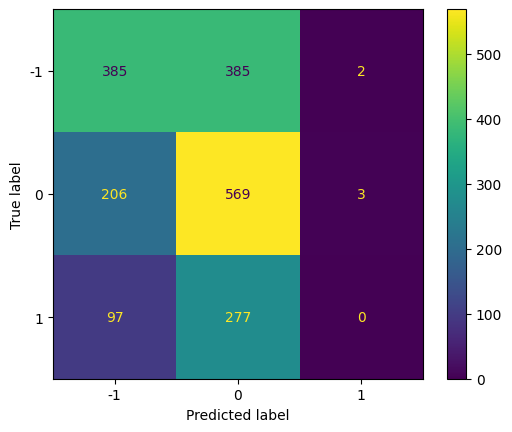

In [554]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat.classes_)
cm_display.plot()

In [555]:
model_cat.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=25, verbose=100)

Learning rate set to 0.112333
0:	learn: 1.0818593	test: 1.0862088	best: 1.0862088 (0)	total: 222ms	remaining: 3m 41s
Stopped by overfitting detector  (25 iterations wait)

bestTest = 1.022477523
bestIteration = 44

Shrink model to first 45 iterations.


In [561]:
model_cat.score(X_test, y_test)

np.float64(0.49584199584199584)

In [557]:
predictions = model_cat.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.56      0.50      0.53       772
           0       0.46      0.73      0.57       778
           1       0.00      0.00      0.00       374

    accuracy                           0.50      1924
   macro avg       0.34      0.41      0.36      1924
weighted avg       0.41      0.50      0.44      1924



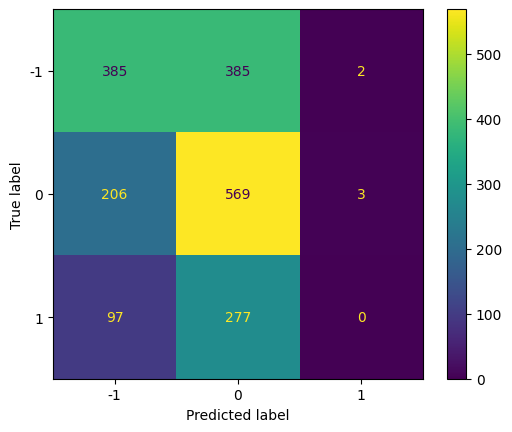

In [558]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_cat.classes_)
cm_display.plot()

# Семантический метод

In [560]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



ModuleNotFoundError: No module named 'gensim'